# Data Exploration

### Import Library

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read Data

You can check out the notebook and the dataset on my GitHub repository

In [2]:
df = pd.read_csv('dataset/car_price.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Figure size 864x576 with 0 Axes>

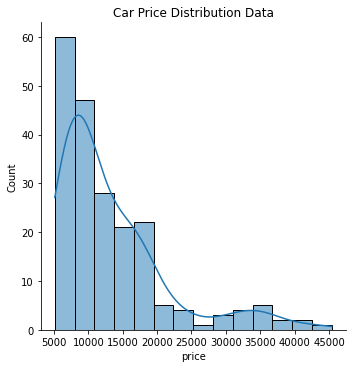

In [5]:
plt.figure(figsize=(12,8))
sns.displot(df['price'], kde=True)
plt.title('Car Price Distribution Data')
plt.show()

In [6]:
cat_var = df.loc[: , df.columns!='CarName'].select_dtypes(include=['object'])
cat_var.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [7]:
for i in cat_var:
    print('{a} : {b} '.format(a=i, b=df[i].unique()))
    print('{c}'.format(c=df[i].nunique()))

fueltype : ['gas' 'diesel'] 
2
aspiration : ['std' 'turbo'] 
2
doornumber : ['two' 'four'] 
2
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 
5
drivewheel : ['rwd' 'fwd' '4wd'] 
3
enginelocation : ['front' 'rear'] 
2
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 
7
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 
7
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 
8


In [8]:
num_var = df.loc[: , df.columns!='CarName'].select_dtypes(include=['float','int64'])
num_var.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


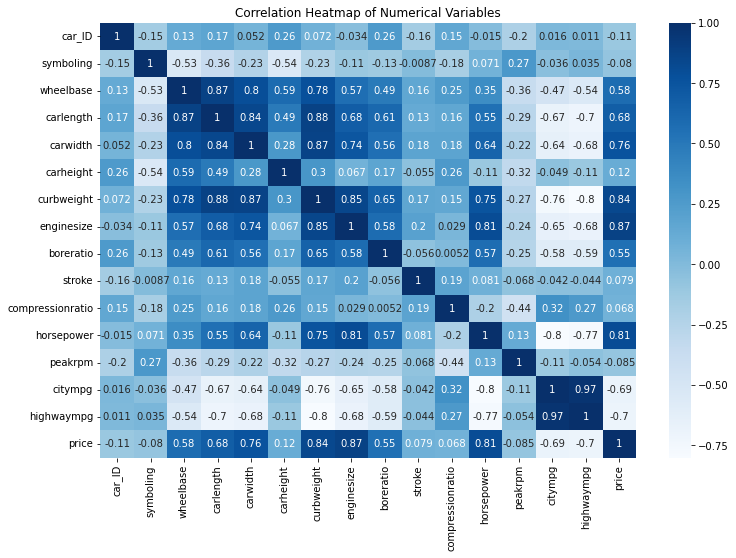

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(num_var.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Single Predictor Linear Regression

<Figure size 864x576 with 0 Axes>

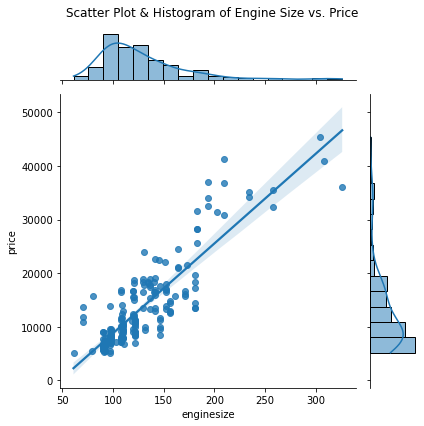

In [10]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df, x='enginesize', y='price', kind='reg').fig.suptitle("Scatter Plot & Histogram of Engine Size vs. Price")
plt.tight_layout()
plt.show()

In [11]:
df_splr = df.copy()

df_splr = df_splr.sample(frac=1).reset_index(drop=True)

df_splr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0
1,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.60,102,5500,24,30,8558.0
2,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.00,62,4800,31,37,6918.0
3,150,0,subaru dl,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.70,111,4800,23,23,11694.0
4,80,1,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.60,102,5500,24,30,7689.0


In [12]:
x_splr = df_splr['enginesize']

y_splr = df_splr['price']

In [13]:
# add constant (represent of intercept) to x variable (where y = a + bx)

x_splr = sm.add_constant(x_splr)
x_splr.head()

,const,enginesize
0,1.0,90
1,1.0,98
2,1.0,92
3,1.0,108
4,1.0,98


In [14]:
train_size = int(0.75 * len(x_splr))

x_train_splr = x_splr[:train_size]
y_train_splr = y_splr[:train_size]

x_test_splr = x_splr[train_size:]
y_test_splr = y_splr[train_size:]

In [15]:
x_train_splr.shape, x_test_splr.shape

((153, 2), (52, 2))

In [16]:
model_splr = sm.OLS(y_train_splr, x_train_splr).fit()

model_splr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     535.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.71e-51
Time:                        09:14:44   Log-Likelihood:                -1473.3
No. Observations:                 153   AIC:                             2951.
Df Residuals:                     151   BIC:                             2957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8972.2379   1001.230     -8.961      0.000    -1.1e+04   -6994.008
enginesize   175.1045      7.570     23.131      0.000     160.147     190.062
==============================================================================
Omnibus:                       23.483   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.013
Skew:                           0.849   Prob(JB):                     6.78e-08
Kurtosis:                       4.514   Cond. No.                         442.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model's R-squared is 0.782 or 78.2%, indicating that the linear model is reasonably effective in predicting price, given that it utilizes only one feature. This value signifies that the model captured 78.2% of the variance in the underlying data.

The F-statistic and corresponding P-value evaluate the validity of the regression analysis in its entirety. A P-value less than 5% indicates the analysis's validity. The null hypothesis for this test is that all regression coefficients equal zero, which is not the case in this scenario. Therefore, the null hypothesis can be rejected, and the alternative hypothesis that regression coefficients are not equal to zero can be accepted.

For each regression coefficient, a P-statistic and corresponding P-value quantify the precision and validity of the coefficient. The P-values of 0.000 for the intercept and 0.000 for the enginesize coefficient demonstrate their validity. The T-statistic and P-value confirm the statistical significance of the relationship between enginesize and price.

eval_env: 1


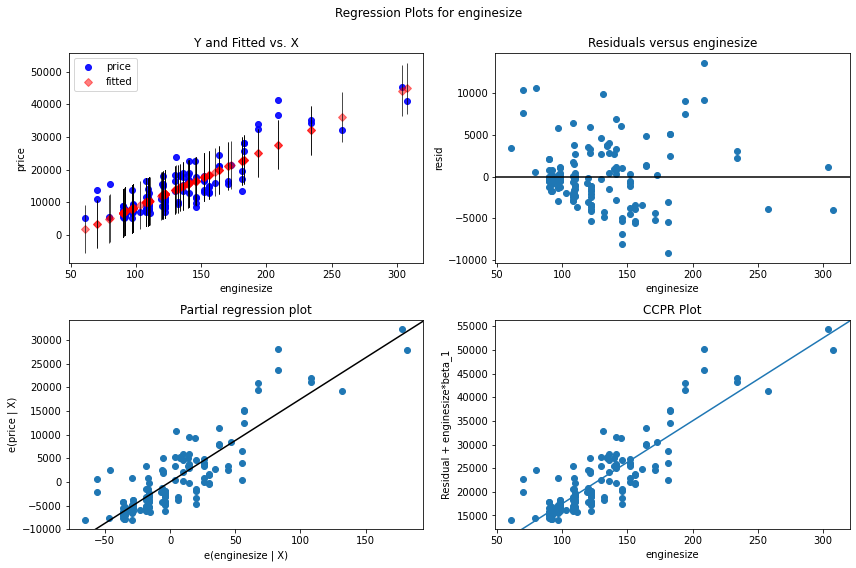

In [17]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model_splr, 'enginesize', fig=fig)

plt.show()

The statsmodels' plot_regress_exog function allows for viewing regression results against a single regressor, which in this case is enginesize. Four different plots are generated by this function:

* The upper-left ('Y and Fitted vs. X') plot displays the fitted values of the regression line (in red) versus the actual values of enginesize and price, with vertical lines representing prediction confidence intervals for each fitted value.
* The second plot, showing the residuals of the regression versus the predictor variable (enginesize), can help identify any non-linear patterns. If residuals are evenly spread out around the 0 line, it indicates that the regression model does not have any non-linear patterns.
* The Partial regression plot is used to demonstrate the effect of adding an independent variable to a model that already has one or more independent variables. As this is a single-variable model, the Partial regression plot simply displays a scatter plot of price versus horsepower with a fitted regression line.
* Lastly, the CCPR (Component-Component Plus Residual) plot allows for assessing the impact of one regressor (enginesize) on the response variable (price) while accounting for the effects of other independent variables. In this case, as there are no other independent variables in this regression, the plot simply shows a scatter plot with a linear model fit on the data.

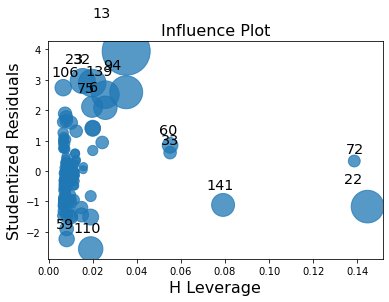

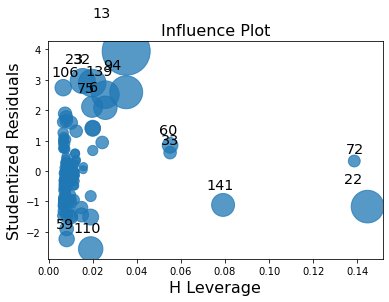

In [18]:
sm.graphics.influence_plot(model_splr)

The influence_plot can be utilized to gain a deeper understanding of the regression model. This plot enables the identification of records in the dataset that have had a significant influence on the regression analysis. The influential data points can be recognized by their large circles in the plot. For instance, the data points with ID 111, 11 and 59 have had a significant impact on the regression results.

In [19]:
y_pred_splr = model_splr.predict(x_test_splr)

y_pred_splr.head()

153    12390.507963
154    10289.254269
155    13791.343760
156     8188.000574
157    12215.403489
dtype: float64

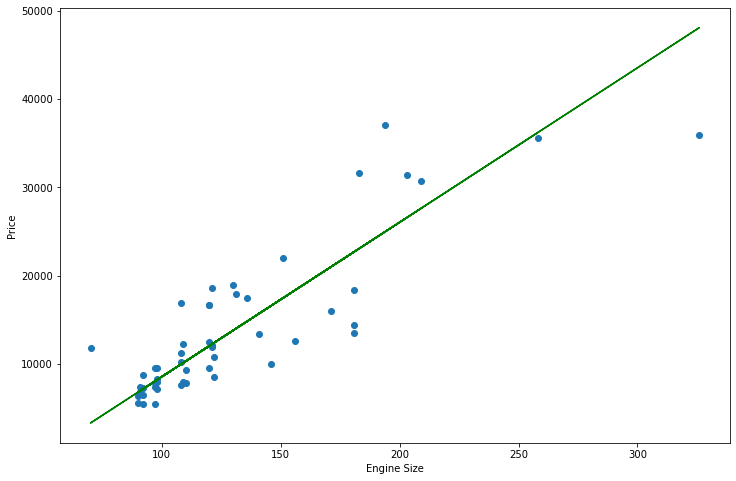

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test_splr['enginesize'], y_test_splr)
plt.plot(x_test_splr['enginesize'], y_pred_splr, color='g')

plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.show()

In [21]:
from sklearn.metrics import r2_score

r2_score(y_test_splr, y_pred_splr)

0.7166308342889856

# Multiple Predictor Linear Regression

In [22]:
df_mplr = df.copy()
df_mplr.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [23]:
cols = ['fueltype','aspiration','doornumber','enginelocation']

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols:
    df_mplr[i] = le.fit_transform(df_mplr[i])
    
df_mplr[cols].sample(5)

,fueltype,aspiration,doornumber,enginelocation
170,1,0,1,0
12,1,0,1,0
66,0,0,0,0
201,1,1,0,0
139,1,0,1,0


In [25]:
df_mplr = df_mplr.drop(columns=['CarName', 'car_ID'])

cat_columns = ['carbody', 'enginetype', 'drivewheel', 'cylindernumber', 'fuelsystem']
for i in cat_columns:
    df_mplr = pd.concat([df_mplr.drop(i, axis=1),
                         pd.get_dummies(df_mplr[i],
                                        prefix = i,
                                        prefix_sep = '_',
                                        drop_first = True)], axis=1)

df_mplr.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [26]:
df_mplr.shape

(205, 44)

In [27]:
df_mplr = df_mplr.sample(frac=1).reset_index(drop=True)

In [28]:
x_mplr = df_mplr.drop(['price'], axis=1)

y_mplr = df_mplr['price']

In [29]:
x_mplr = sm.add_constant(x_mplr)

x_mplr.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,3,1,1,1,0,95.9,173.2,66.3,50.2,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0,0,1,0,0,107.9,186.7,68.4,56.7,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0,1,0,0,0,97.0,173.5,65.4,53.0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,3,1,1,1,0,95.9,173.2,66.3,50.2,...,0,0,0,0,0,0,1,0,0,0
4,1.0,-1,1,0,0,0,102.4,175.6,66.5,53.9,...,0,0,0,0,0,0,0,1,0,0


In [30]:
train_size = int(0.75 * len(x_mplr))

x_train_mplr = x_mplr[:train_size]
y_train_mplr = y_mplr[:train_size]

x_test_mplr = x_mplr[train_size:]
y_test_mplr = y_mplr[train_size:]

In [31]:
model_mplr = sm.OLS(y_train_mplr, x_train_mplr).fit()

model_mplr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     42.44
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.87e-51
Time:                        09:14:45   Log-Likelihood:                -1377.7
No. Observations:                 153   AIC:                             2837.
Df Residuals:                     112   BIC:                             2962.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.833e+04   1.22e+04     -1.497      0.137   -4.26e+04    5935.879
symboling              -232.2951    315.140     -0.737      0.463    -856.704     392.114
fueltype              -1.661e+04   6355.752     -2.614      0.010   -2.92e+04   -4017.974
aspiration             1549.2830   1116.934      1.387      0.168    -663.778    3762.344
doornumber              563.1566    762.918      0.738      0.462    -948.468    2074.781
enginelocation         5369.7734   3404.248      1.577      0.118   -1375.308    1.21e+04
wheelbase                13.8285    128.299      0.108      0.914    -240.379     268.036
carlength               -49.8365     60.051     -0.830      0.408    -168.819      69.146
carwidth                640.8175    287.159      2.232      0.028      71.849    1209.786
carheight               103.6395    164.286      0.631      0.529    -221.873     429.152
curbweight                4.2974      2.188      1.964      0.052      -0.038       8.632
enginesize              120.0400     32.991      3.639      0.000      54.673     185.406
boreratio             -1890.3683   1804.387     -1.048      0.297   -5465.530    1684.793
stroke                -3707.0876   1124.696     -3.296      0.001   -5935.528   -1478.647
compressionratio       -922.2043    694.957     -1.327      0.187   -2299.172     454.764
horsepower                2.6840     28.402      0.095      0.925     -53.591      58.959
peakrpm                   3.1032      0.756      4.104      0.000       1.605       4.601
citympg                -183.2959    188.863     -0.971      0.334    -557.504     190.912
highwaympg              210.1894    163.112      1.289      0.200    -112.997     533.375
carbody_hardtop       -4424.1684   2099.338     -2.107      0.037   -8583.737    -264.600
carbody_hatchback     -5120.3320   2075.897     -2.467      0.015   -9233.455   -1007.209
carbody_sedan         -4035.1434   2227.439     -1.812      0.073   -8448.529     378.242
carbody_wagon         -5404.5879   2427.593     -2.226      0.028   -1.02e+04    -594.623
enginetype_dohcv      -7375.9884   5629.547     -1.310      0.193   -1.85e+04    3778.238
enginetype_l           -492.3068   2054.920     -0.240      0.811   -4563.867    3579.253
enginetype_ohc         3952.9199   1229.785      3.214      0.002    1516.258    6389.582
enginetype_ohcf        3087.2629   2029.970      1.521      0.131    -934.863    7109.389
enginetype_ohcv       -5602.2183   1616.105     -3.466      0.001   -8804.323   -2400.114
enginetype_rotor       -379.8507   1858.901     -0.204      0.838   -4063.024    3303.323
drivewheel_fwd          247.7560   1309.859      0.189      0.850   -2347.562    2843.074
drivewheel_rwd         1124.1993   1456.495      0.772      0.442   -1761.658    4010.057
cylindernumber_five   -

In [32]:
y_pred_mplr = model_mplr.predict(x_test_mplr)

y_pred_mplr.head()

153    10628.823355
154    19571.717133
155    33221.372407
156     6142.281086
157    11119.029378
dtype: float64

In [33]:
from sklearn.metrics import r2_score

r2_score(y_test_mplr, y_pred_mplr)

0.9250350535489347

In [34]:
data_actual_pred = pd.DataFrame({'Actual Value' : y_test_mplr.ravel(),
                                 'Predicted Value' : y_pred_mplr})

data_actual_pred.head()

,Actual Value,Predicted Value
153,9895.0,10628.823355
154,17669.0,19571.717133
155,32528.0,33221.372407
156,6849.0,6142.281086
157,9960.0,11119.029378


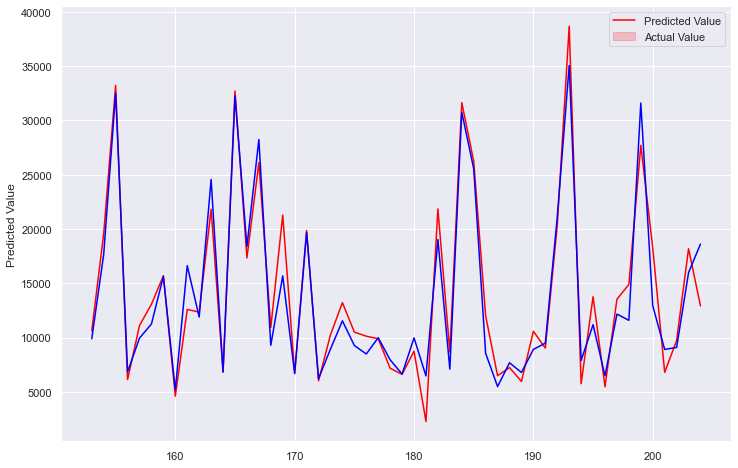

In [56]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x=data_actual_pred.index, y='Predicted Value', data=data_actual_pred, color='red', ax = ax)
sns.lineplot(x=data_actual_pred.index, y='Actual Value', data=data_actual_pred, color='blue', ax = ax)

plt.legend(['Predicted Value','Actual Value'])

# Conclusion